# Dependencies

In [1]:
import os
import yaml
import cv2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

from glob import glob
from PIL import Image
from ultralytics import YOLO
from IPython import display as IDisplay

In [3]:
# Download latest version
# path = kagglehub.dataset_download("princekhunt19/road-detection-imgs-and-labels")

# print("Path to dataset files:", path)

In [4]:
HOME = '.'

In [5]:
# Paths
train_path = f"{HOME}/datasets/train"
test_path = f"{HOME}/datasets/test"
val_path = f"{HOME}/datasets/val"

In [6]:
print(f"Training images: {len(os.listdir(train_path+'/images'))}")
print(f"Validation images: {len(os.listdir(val_path+'/images'))}")
print(f"Testing images: {len(os.listdir(test_path+'/images'))}")

Training images: 1263
Validation images: 158
Testing images: 167


In [7]:
with open(f"{HOME}/datasets/dataset.yaml", 'r') as file: 
    data = yaml.safe_load(file)   
        # Extract class namess
    class_names = list(data['names'].values())
print(class_names)

['Trafic Light Signal', 'Stop Signal', 'Speedlimit Signal', 'Crosswalk Signal', 'Crosswalk', 'Pedestrian', 'Bus', 'Car', 'Truck']


In [8]:
def draw_yolo_boxes(image_path, label_path, class_names=class_names):
    # Load the image
    image = cv2.imread(image_path)
    height, width, _ = image.shape
    
    # Read YOLO label file
    with open(label_path, "r") as f:
        lines = f.readlines()
    
    for line in lines:
        data = line.strip().split()
        class_id = int(data[0])
        x_center, y_center, w, h = map(float, data[1:])
        
        # Convert YOLO format (normalized) to pixel values
        x1 = int((x_center - w / 2) * width)
        y1 = int((y_center - h / 2) * height)
        x2 = int((x_center + w / 2) * width)
        y2 = int((y_center + h / 2) * height)

        # Choose color and label
        color = (0, 255, 0)  # Green box
        label = f"Class {class_id}" if class_names is None else class_names[class_id]

        # Draw rectangle
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        
        # Put label text
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Show the image with bounding boxes
        plt.figure(figsize=(10, 6))
        plt.imshow(image)
        plt.axis("off")  # Hide axes
        plt.show()
    # Save output
    # cv2.imwrite("output.jpg", image)


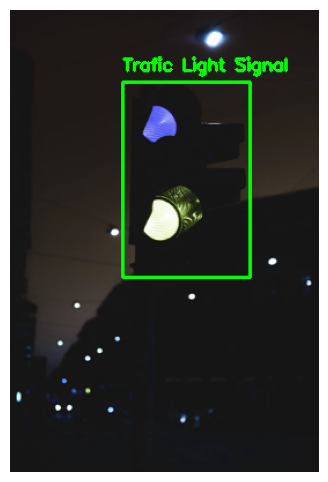

In [9]:
draw_yolo_boxes('./datasets/train/images/i0.png',
                './datasets/train/labels/i0.txt'
                )

In [10]:
model = YOLO("yolo11n.pt")

In [ ]:
train_results = model.train(
    data=f"{HOME}/datasets/dataset.yaml",  # path to dataset YAML
    epochs=1,  # number of training epochs
    imgsz=480  # training image size,
)

New https://pypi.org/project/ultralytics/8.3.70 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.68  Python-3.12.8 torch-2.5.1+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=./datasets/dataset.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=480, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train20, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fra

train: Scanning D:\LapTrinh\ML_Zoomcamp2024\Capstone2\datasets\train\labels.cache... 1263 images, 5 backgrounds, 0 corrupt: 100%|██████████| 1263/1263 [00:00<?, ?it/s]
val: Scanning D:\LapTrinh\ML_Zoomcamp2024\Capstone2\datasets\val\labels.cache... 158 images, 0 backgrounds, 0 corrupt: 100%|██████████| 158/158 [00:00<?, ?it/s]


Plotting labels to runs\detect\train20\labels.jpg... 

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 480 train, 480 val
Using 0 dataloader workers
Logging results to runs\detect\train20
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/79 [00:00<?, ?it/s]

In [12]:
metric = model.val()

Ultralytics 8.3.68  Python-3.12.8 torch-2.5.1+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)
YOLO11n summary (fused): 238 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning D:\LapTrinh\ML_Zoomcamp2024\Capstone2\datasets\val\labels.cache... 158 images, 0 backgrounds, 0 corrupt: 100%|██████████| 158/158 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]


                   all        158        794      0.875      0.421      0.548      0.391
   Trafic Light Signal          8         16          1      0.194      0.342       0.17
           Stop Signal          8          8      0.728      0.875      0.826      0.715
     Speedlimit Signal         67         71      0.893      0.587      0.905      0.772
      Crosswalk Signal         17         21      0.801      0.383       0.44       0.34
             Crosswalk         17         18          1       0.64      0.793      0.538
            Pedestrian         10         29      0.662      0.828      0.767      0.516
                   Bus          8          9          1          0     0.0151     0.0111
                   Car         45        407      0.949       0.15      0.431      0.226
                 Truck         43        215      0.846      0.135      0.412      0.229
Speed: 0.7ms preprocess, 34.5ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to runs\detec


0: 480x480 (no detections), 59.0ms
Speed: 2.0ms preprocess, 59.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 480)


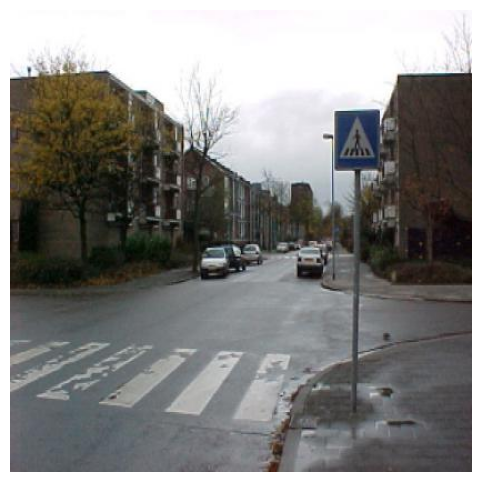

In [21]:
results = model(["./datasets/val/images/i1051.jpg"])
for i, r in enumerate(results):
    im_bgr = r.plot()
    im_rgb = Image.fromarray(im_bgr[..., ::-1])
    plt.figure(figsize=(10, 6))
    plt.imshow(im_rgb)  # Display RGB image
    plt.axis("off")  # Hide axes
    plt.show()

# Hyperparameter tuning

- **Initial Learning Rate:** 0.01, 0.001
- **Learning Rate Fraction:** 0.1, 0.5
- **Degrees:** 0, 45
- **Shear:** 0, 5
- **Batch:** 16
- **Patience:** 8
- **Epochs:** 30
- **Optimizer:** AdamW

In [3]:
search_space = {
    "lr0": (0.01, 0.001),
    "lrf": (0.1,0.5),
    "degrees": (0.0, 45.0),
    "scale": (0.0, 0.5,0.9),
    "shear": (0.0,5.0)
}

model.tune(
    data="./datasets/dataset.yaml",
    epochs = 30,
    optimizer="AdamW",
    space = search_space,
    save=True,
    val = True,
    batch = 16,
    patience = 8,
    device = "0",
    amp=False # My GPU cannot enable this
)


NameError: name 'model' is not defined

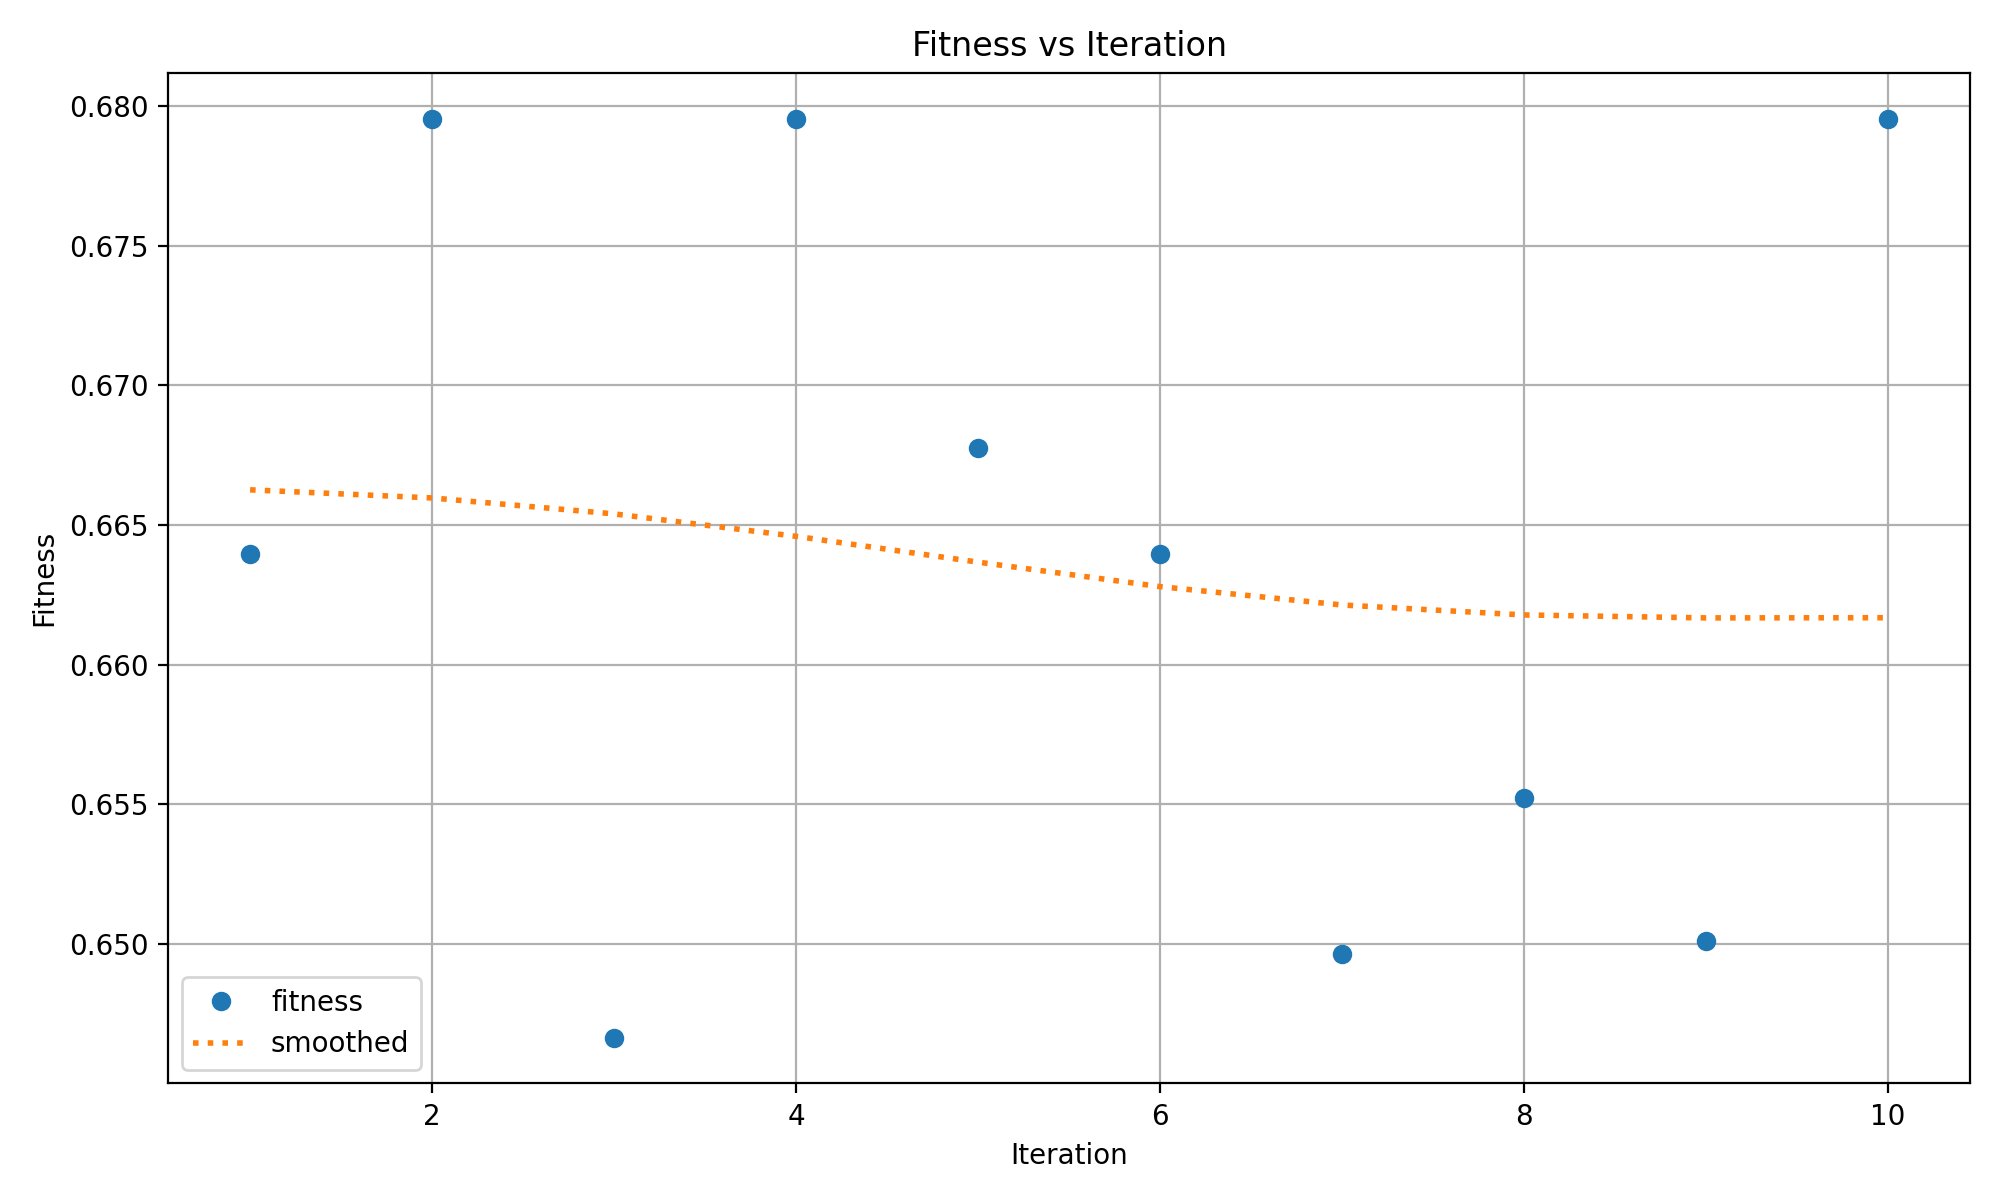

In [16]:
IDisplay.Image("./runs/detect/tune/tune_fitness.png")

Conclusion:

- Fitness isn't stable, it should be decrease over iterations
- So my tuning process wasn't good.



In [2]:
df = pd.read_csv("runs/detect/tune/tune_results.csv")
display(df)

,fitness,lr0,lrf,degrees,scale,shear
0,0.66396,0.001,0.10000,0.0,0.50000,0.0
1,0.67955,0.001,0.11528,0.0,0.50000,0.0
2,0.64665,0.001,0.11528,0.0,0.47627,0.0
3,0.67955,0.001,0.11528,0.0,0.50000,0.0
4,0.66777,0.001,0.11044,0.0,0.50000,0.0
5,0.66396,0.001,0.10000,0.0,0.50000,0.0
6,0.64965,0.001,0.11528,0.0,0.47623,0.0
7,0.65521,0.001,0.11081,0.0,0.47480,0.0
8,0.65010,0.001,0.11333,0.0,0.47254,0.0
9,0.67955,0.001,0.11528,0.0,0.50000,0.0


My best model is in train 10

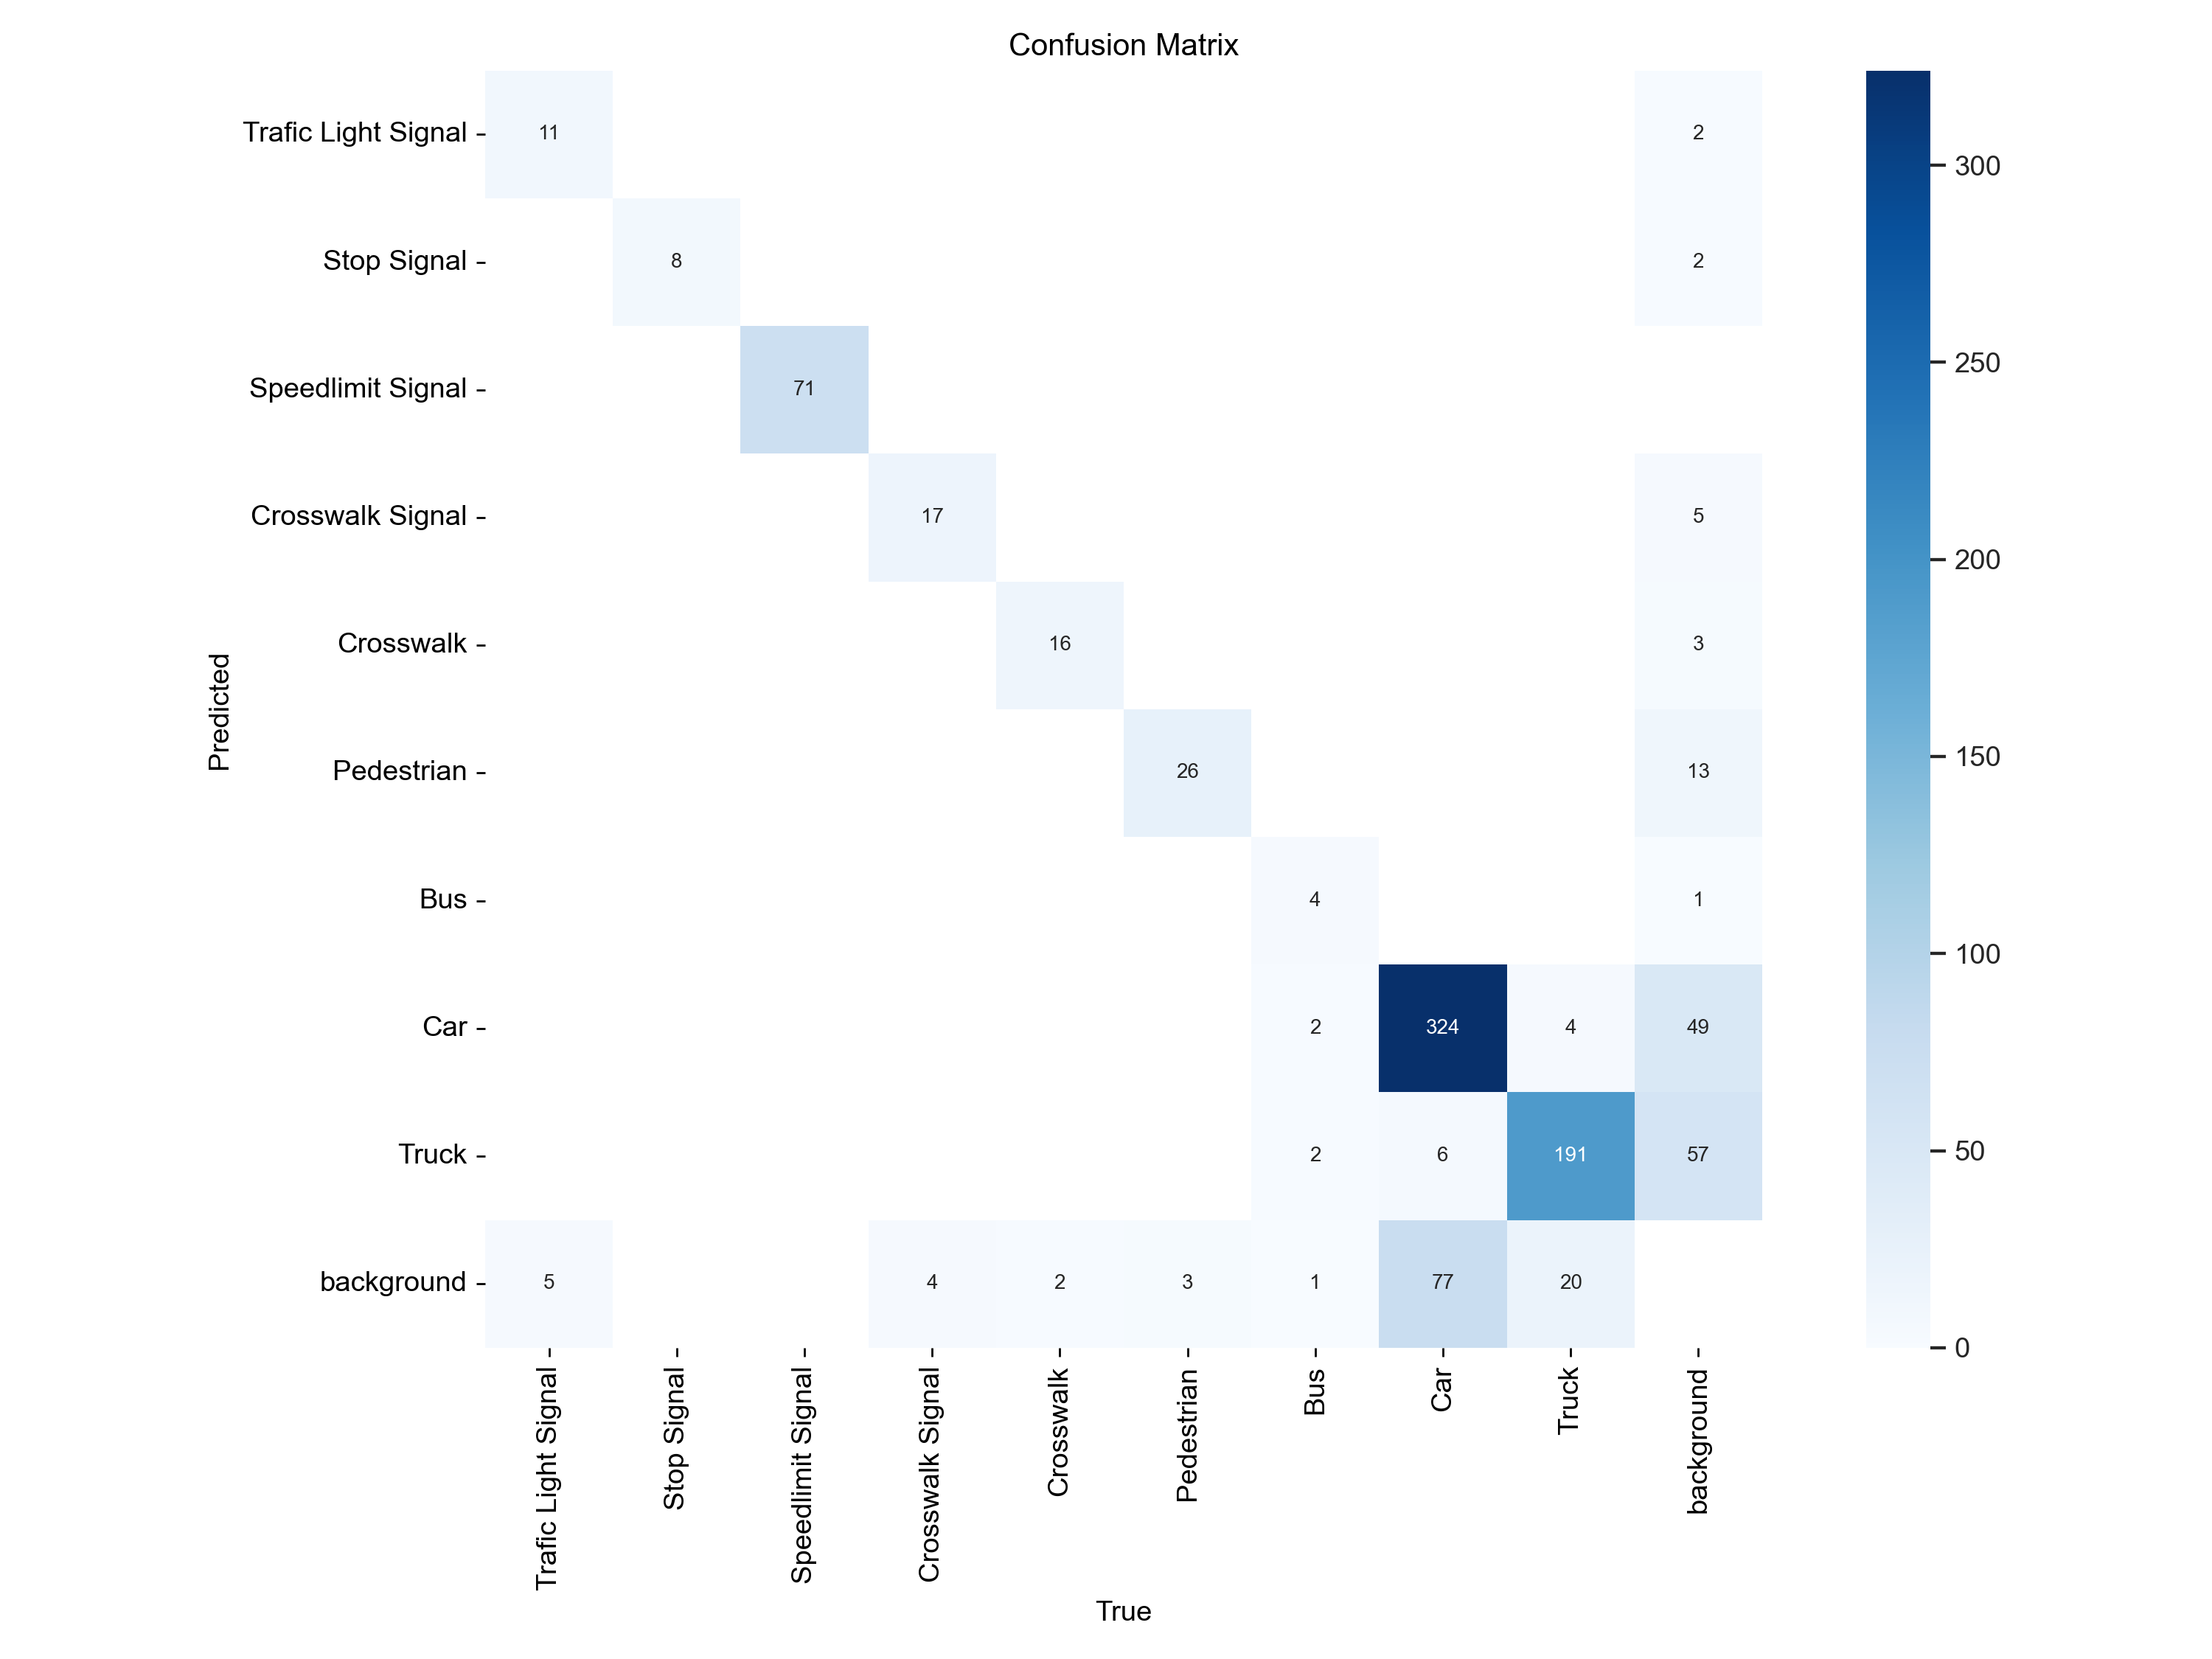

In [3]:
IDisplay.Image("./runs/detect/train10/confusion_matrix.png")

# Conclusion
- Model predicts Bus and Background label having low accuracy.
